In [1]:
# import all necessary packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import missingno as msno
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import preprocessing
import seaborn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score
from statsmodels.formula.api import logit

In [2]:
# Pulling in the data [In text citation: Bowne-Anderson, H. (n.d)]
churned_data = pd.read_csv("C:/Users/cfman/OneDrive/Desktop/WGUClasses/D209 Data Mining 1/Task 1/churn_clean.csv")

In [3]:
# Before we get started into the actual cleaning, I want to check for duplicate values in case we need to edit those first
# I am also going to check the shape of the dataframe to verify the rows and columns
# [In text citation: Bowne-Anderson, H. (n.d)]
print(churned_data.shape)


duplicates = churned_data.duplicated(keep = False)
duplicates.value_counts()

(10000, 50)


False    10000
dtype: int64

In [4]:
# I want to check which have missing values here
# [In text citation: Bowne-Anderson, H. (n.d)]
churned_data.isna().sum()
#churned_data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

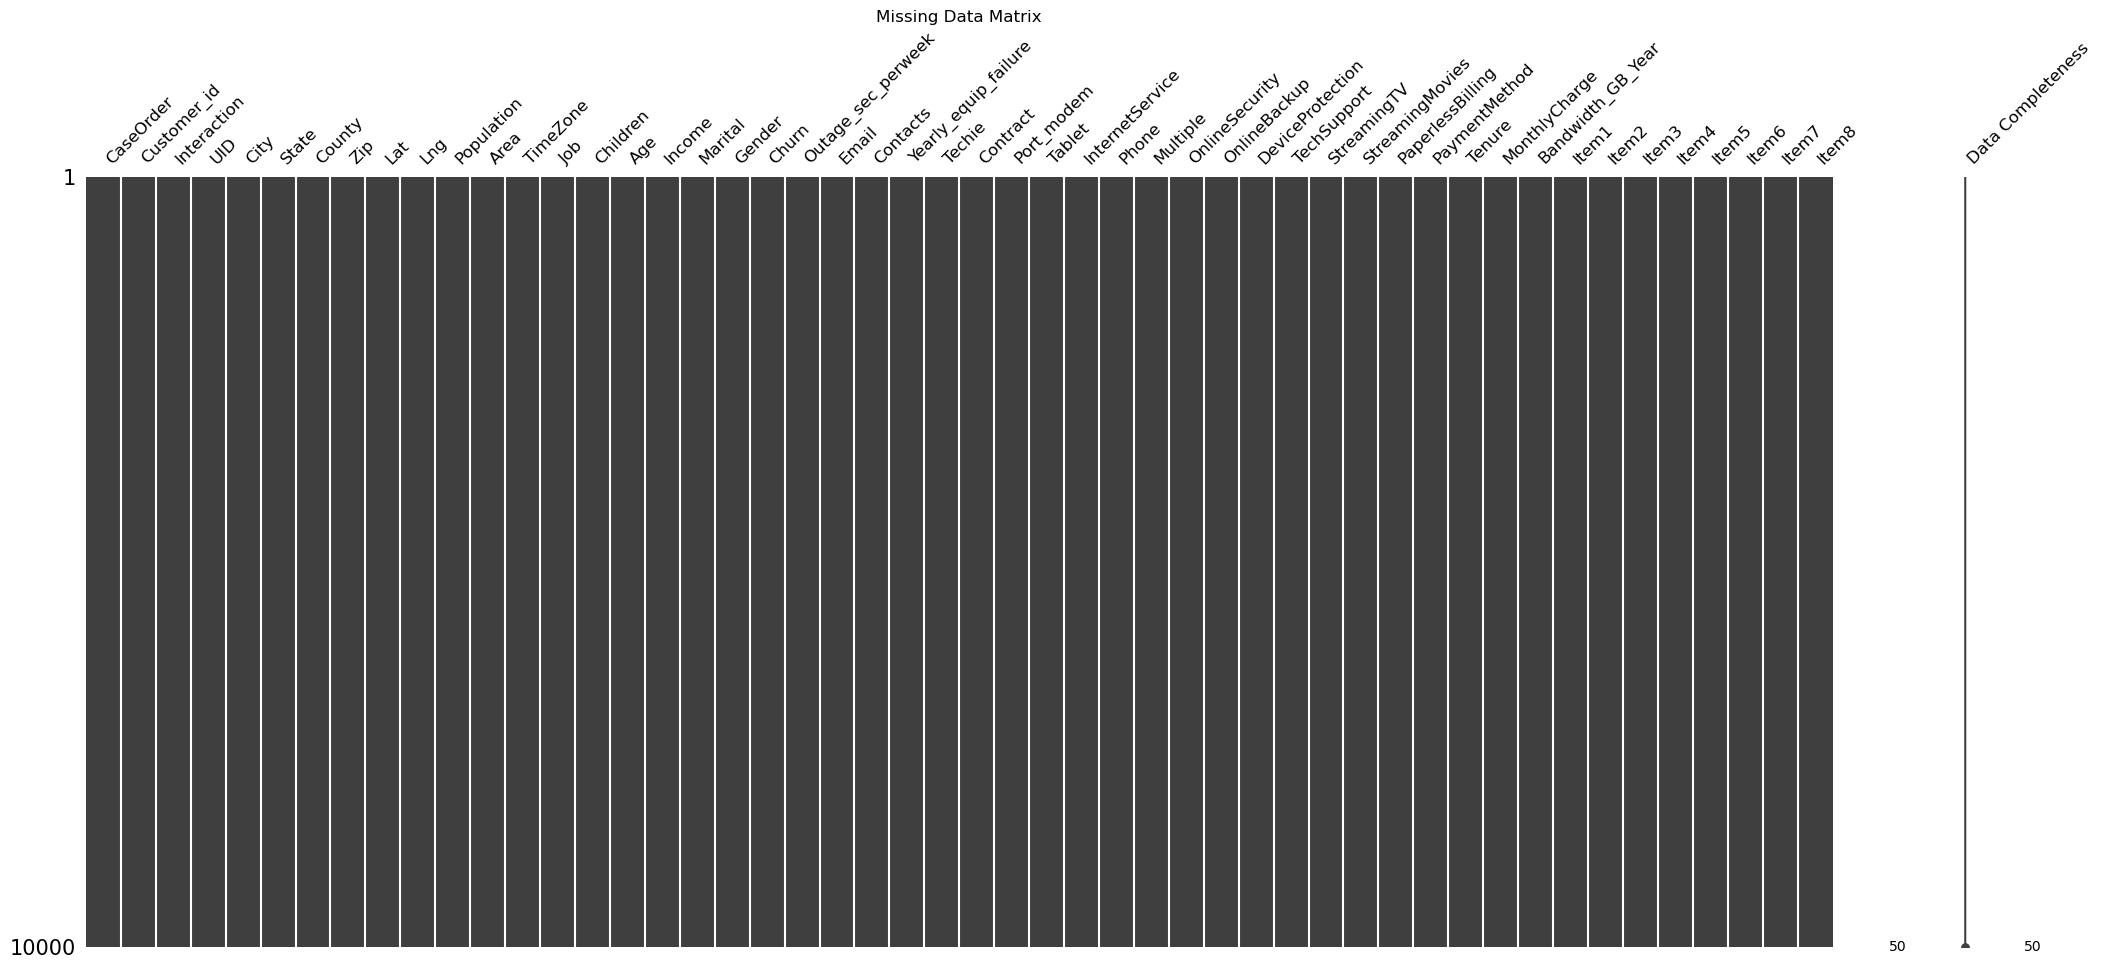

In [5]:
# Visualizing the missing data 
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Cleaning Essentials]
msno.matrix(churned_data, fontsize = 12, labels = True)
plt.title("Missing Data Matrix")
#plt.xlabel(col_names)
plt.show()

In [6]:
## Checking all the quantitative variables for outliers to decide if I need to edit them.

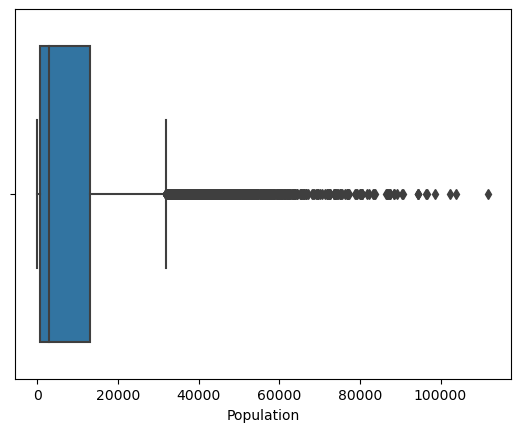

In [7]:
boxplot_population = seaborn.boxplot(x = "Population", data = churned_data)


In [8]:
## Choosing to retain outliers

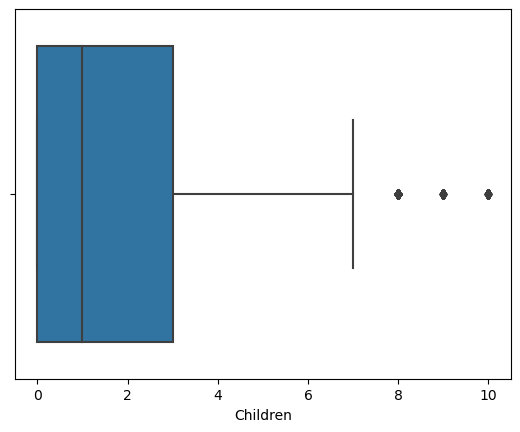

In [9]:
boxplot_Children = seaborn.boxplot(x = "Children", data = churned_data)

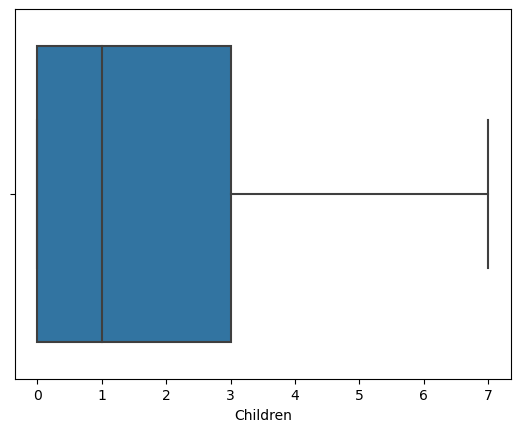

In [10]:
## Removing the  instances outlier and rechecking the plot
Children_outliers = churned_data[ (churned_data["Children"] > 7)]

churned_data.drop(churned_data[ (churned_data["Children"] > 7)].index, inplace = True )
Children_removed_outliers = seaborn.boxplot(x = "Children", data = churned_data)

In [11]:
## No more outliers detected for Children

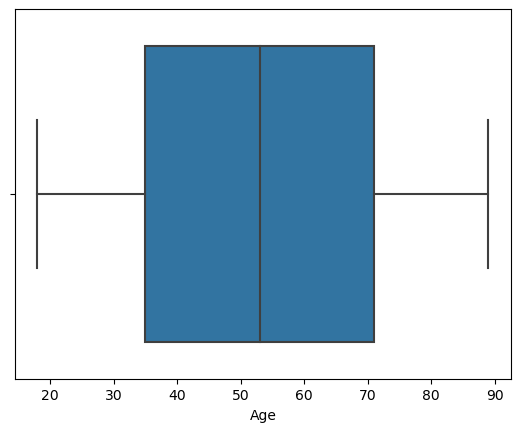

In [12]:
boxplot_Age = seaborn.boxplot(x = "Age", data = churned_data)

In [13]:
## No outliers detected for Age

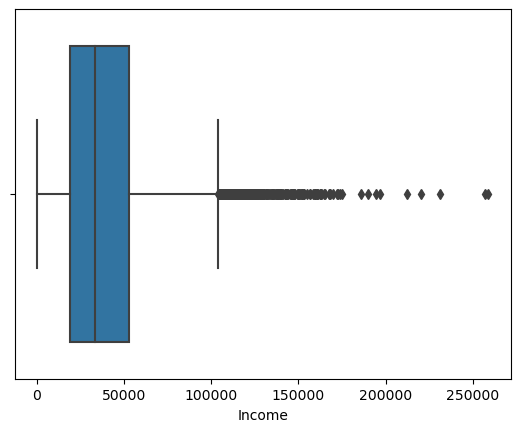

In [14]:
boxplot_Income = seaborn.boxplot(x = "Income", data = churned_data)

19268.980000000003 53141.83
33872.85
-31540.29499999999 103951.105


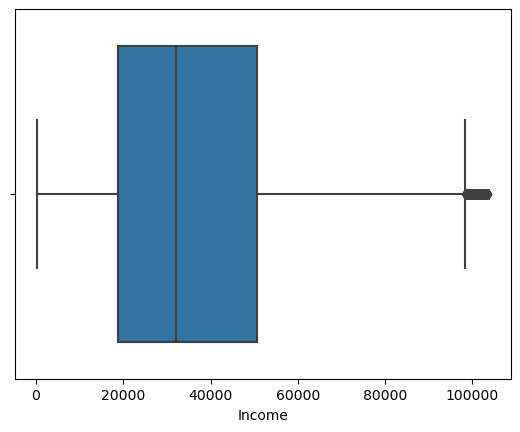

In [15]:
## Re-using my code that I created for D206, I will find the quartile ranges and then drop the necessary values. 

Income_q1, Income_q3 = np.percentile(churned_data["Income"], [25,75])
print(Income_q1, Income_q3)

Income_iqr = Income_q3 - Income_q1
print(Income_iqr)

Income_lower_limit = Income_q1 - (1.5*Income_iqr)
Income_upper_limit = Income_q3 + (1.5*Income_iqr)
print(Income_lower_limit, Income_upper_limit)

## Removing the  instances outlier and rechecking the plot
Income_outliers = churned_data[ (churned_data["Income"] > Income_upper_limit)]
#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Income"] > Income_upper_limit)].index, inplace = True )
Income_removed_outliers = seaborn.boxplot(x = "Income", data = churned_data)

In [16]:
## Going to RETAIN the outliers as there is depreciating returns on the continued reduction of the sample size

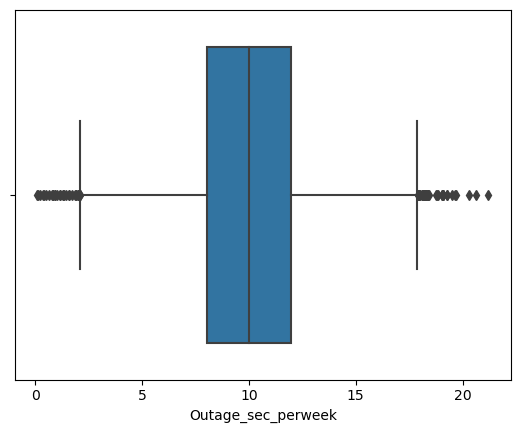

In [17]:
boxplot_Outage = seaborn.boxplot(x = "Outage_sec_perweek", data = churned_data)

8.024894 11.97165632
3.9467623199999995
2.1047505200000005 17.891799799999998


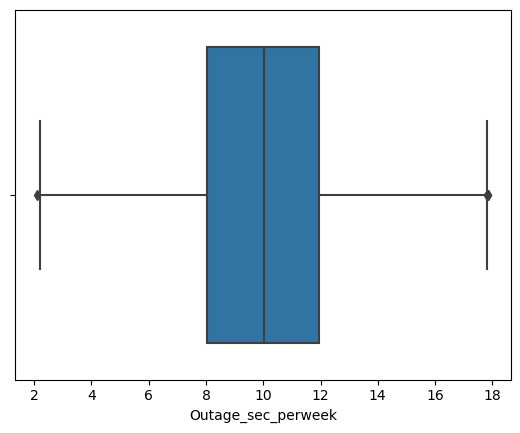

In [18]:
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Outage_q1, Outage_q3 = np.percentile(churned_data["Outage_sec_perweek"], [25,75])
print(Outage_q1, Outage_q3)

Outage_iqr = Outage_q3 - Outage_q1
print(Outage_iqr)

Outage_lower_limit = Outage_q1 - (1.5*Outage_iqr)
Outage_upper_limit = Outage_q3 + (1.5*Outage_iqr)
print(Outage_lower_limit, Outage_upper_limit)

## Removing the values < 0
churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] < 0)].index, inplace = True )

## Removing the  instances outlier and rechecking the plot
Outage_sec_perweek_outliers = churned_data[ (churned_data["Outage_sec_perweek"] > Outage_upper_limit)]
Outage_sec_perweek_outliers.append(churned_data[(churned_data["Outage_sec_perweek"] < Outage_lower_limit)])
#Outage_sec_perweek_outliers.info()

churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] > Outage_upper_limit)].index, inplace = True )
churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] < Outage_lower_limit)].index, inplace = True )

Outage_sec_perweek_removed_outliers = seaborn.boxplot(x = "Outage_sec_perweek", data = churned_data)

In [19]:
## Going to RETAIN the couple of straggling outliers since they are so close to the data

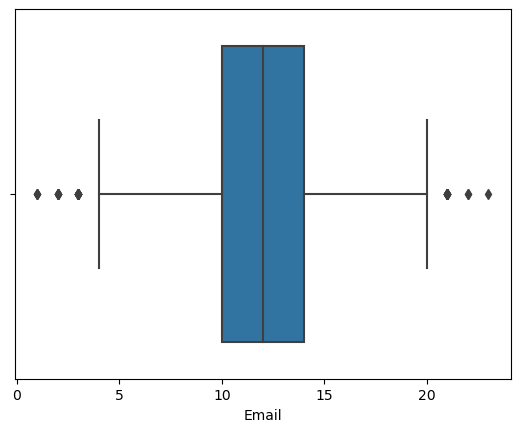

In [20]:
boxplot_Email = seaborn.boxplot(x = "Email", data = churned_data)

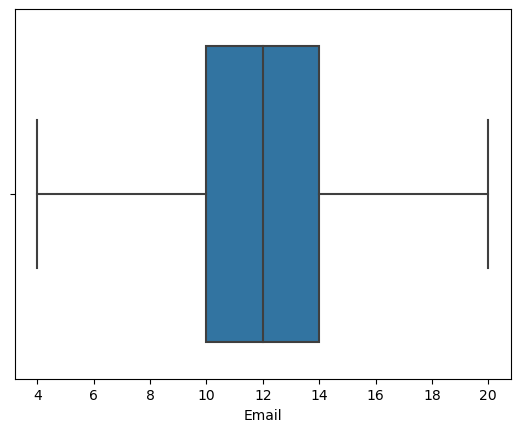

In [21]:
## Removing the  instances outlier and rechecking the plot
Email_outliers = churned_data[ (churned_data["Email"] > 20)]
Email_outliers.append(churned_data[(churned_data["Email"] < 4)])

#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Email"] > 20)].index, inplace = True )
churned_data.drop(churned_data[ (churned_data["Email"] < 4)].index, inplace = True )
Email_removed_outliers = seaborn.boxplot(x = "Email", data = churned_data)

In [22]:
## No more outliers detected for Email

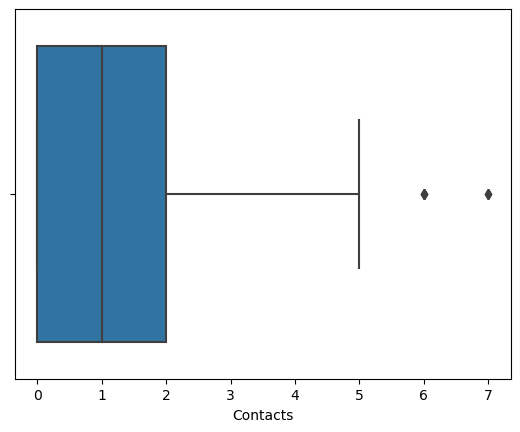

In [23]:
boxplot_Contacts = seaborn.boxplot(x = "Contacts", data = churned_data)

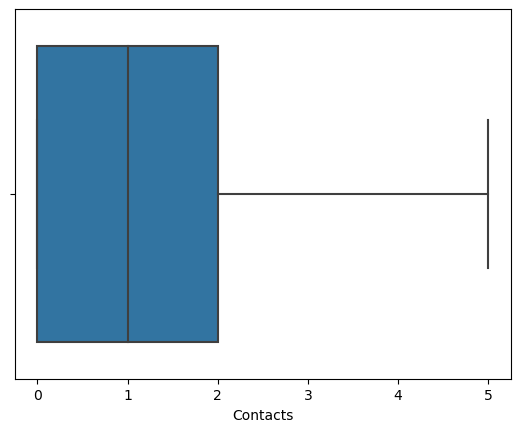

In [24]:
## Removing the  instances outlier and rechecking the plot
Contacts_outliers = churned_data[ (churned_data["Contacts"] > 5)]
#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Contacts"] > 5)].index, inplace = True )
Contacts_removed_outliers = seaborn.boxplot(x = "Contacts", data = churned_data)

In [25]:
## No more outliers detected for Contacts

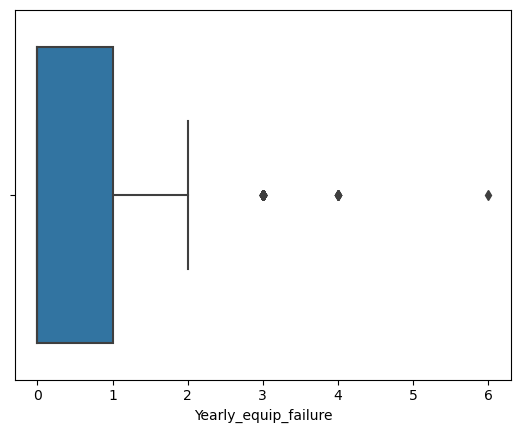

In [26]:
boxplot_Yearly_equip_failure = seaborn.boxplot(x = "Yearly_equip_failure", data = churned_data)

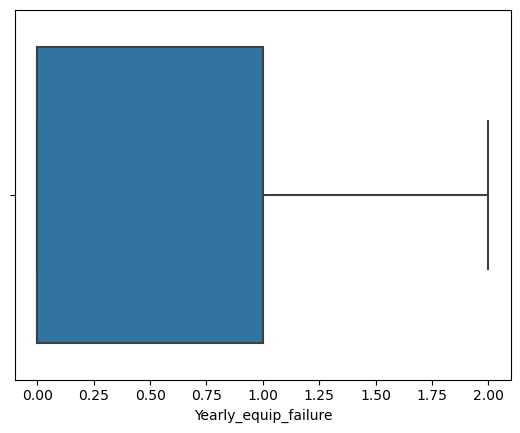

In [27]:
Yearly_equip_failure_outliers = churned_data[ (churned_data["Yearly_equip_failure"] > 2)]
#Yearly_equip_failure_outliers.info()

churned_data.drop(churned_data[ (churned_data["Yearly_equip_failure"] > 2)].index, inplace = True )
Yearly_equip_failure_removed_outliers = seaborn.boxplot(x = "Yearly_equip_failure", data = churned_data)

In [28]:
## No more outliers detected for Yearly_equip_failure

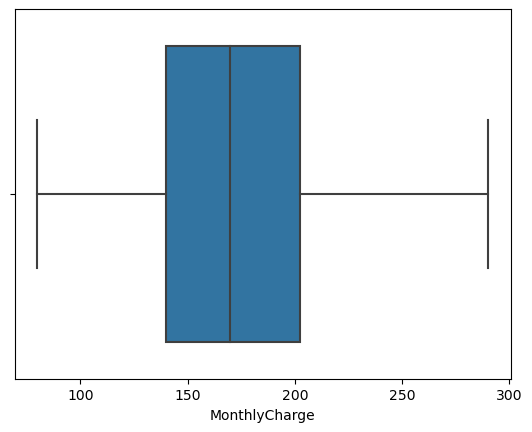

In [29]:
boxplot_MonthlyCharge = seaborn.boxplot(x = "MonthlyCharge", data = churned_data)

In [30]:
## No outliers detected for MonthlyCharge

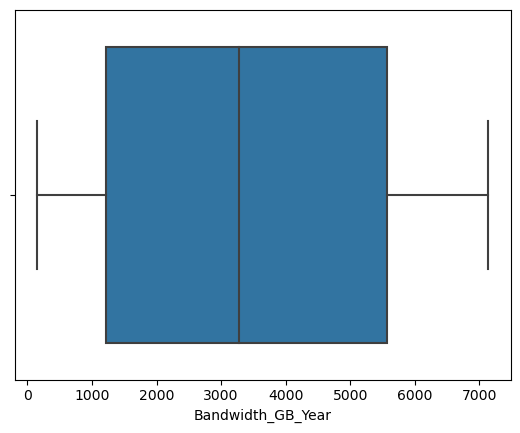

In [31]:
boxplot_Bandwidth_GB_Year = seaborn.boxplot(x = "Bandwidth_GB_Year", data = churned_data)

In [32]:
## No outliers detected for Bandwidth_GB_Year

In [33]:
churned_data.shape

(9079, 50)

In [34]:
## I'm going to create a new dataframe that has just the information and columns that i will use for my analysis.
## I want to use the same variables I used in D208
## me 15 explanatory variables to use in the regression. Techie, Multiple, StreamingTV, TechSupport, OnlineSecurity are the categorical variables I will look at

churned_data_kNN = churned_data.drop(columns = ['CaseOrder', 'Customer_id','Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job',
                                                   'Marital', 'Gender', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone',
                                                   'OnlineBackup', 'DeviceProtection', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
                                                  'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [35]:
## Checking the new data set. 
## or to check on a specific customer without any data loss. Should have 18 columns now.
churned_data_kNN.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Multiple,OnlineSecurity,TechSupport,StreamingTV,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,No,7.978323,10,0,1,No,No,Yes,No,No,172.455519,904.536110
1,10446,1,27,21704.77,Yes,11.699080,12,0,1,Yes,Yes,Yes,No,Yes,242.632554,800.982766
2,3735,4,50,9609.57,No,10.752800,9,0,1,Yes,Yes,No,No,No,159.947583,2054.706961
3,13863,1,48,18925.23,No,14.913540,15,2,0,Yes,No,Yes,No,Yes,119.956840,2164.579412
4,11352,0,83,40074.19,Yes,8.147417,16,2,1,No,No,No,Yes,Yes,149.948316,271.493436


In [36]:
## Getting a list of all of the columns names except for the CaseOrder and Customer_id

column_headers = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'MonthlyCharge', 'StreamingTV', 'Churn', 'Bandwidth_GB_Year']
churned_cont =['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Email', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']
churned_cat = ['Churn','Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV',]
print("The Column Header :", column_headers)

The Column Header : ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'MonthlyCharge', 'StreamingTV', 'Churn', 'Bandwidth_GB_Year']


In [37]:
## Getting the summary statistics for each categorical variable

for i in range (0, len(churned_cat)):
    count, unique, top, freq = churned_data_kNN[churned_cat[i]].describe()
    print("Descriptive statistics for ", churned_cat[i], '\n', churned_data_kNN[churned_cat[i]].describe(), '\n')
    print("The overall proportion of responses is ", round((freq/count)*100, 2),"%", top, '\n')
    


Descriptive statistics for  Churn 
 count     9079
unique       2
top         No
freq      6666
Name: Churn, dtype: object 

The overall proportion of responses is  73.42 % No 

Descriptive statistics for  Techie 
 count     9079
unique       2
top         No
freq      7563
Name: Techie, dtype: object 

The overall proportion of responses is  83.3 % No 

Descriptive statistics for  Multiple 
 count     9079
unique       2
top         No
freq      4881
Name: Multiple, dtype: object 

The overall proportion of responses is  53.76 % No 

Descriptive statistics for  OnlineSecurity 
 count     9079
unique       2
top         No
freq      5830
Name: OnlineSecurity, dtype: object 

The overall proportion of responses is  64.21 % No 

Descriptive statistics for  TechSupport 
 count     9079
unique       2
top         No
freq      5694
Name: TechSupport, dtype: object 

The overall proportion of responses is  62.72 % No 

Descriptive statistics for  StreamingTV 
 count     9079
unique       2
t

In [38]:
## Getting the summary statistics for each continuous variable

for i in range (0, len(churned_cont)):
    print("Descriptive statistics for ", churned_cont[i], '\n', churned_data_kNN[churned_cont[i]].describe(), '\n')
    


Descriptive statistics for  Population 
 count      9079.000000
mean       9761.602269
std       14434.479659
min           0.000000
25%         745.000000
50%        2889.000000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64 

Descriptive statistics for  Children 
 count    9079.000000
mean        1.810992
std         1.695791
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         7.000000
Name: Children, dtype: float64 

Descriptive statistics for  Age 
 count    9079.000000
mean       53.210376
std        20.668749
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64 

Descriptive statistics for  Income 
 count      9079.000000
mean      36742.304085
std       22857.868877
min         348.670000
25%       18843.450000
50%       32125.500000
75%       50558.085000
max      103625.100000
Name: Income, dtype: float64 

Descriptive statis

Univariate plot for  Population 



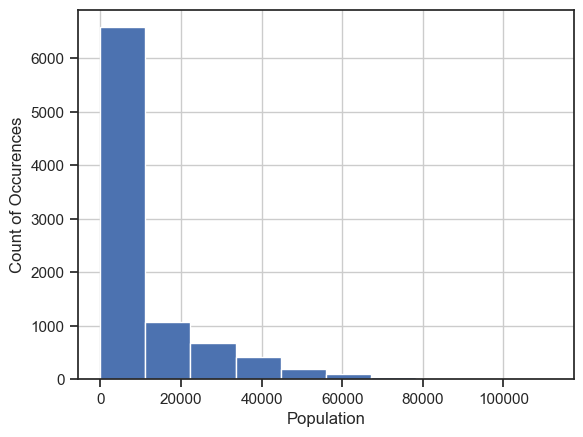

Univariate plot for  Children 



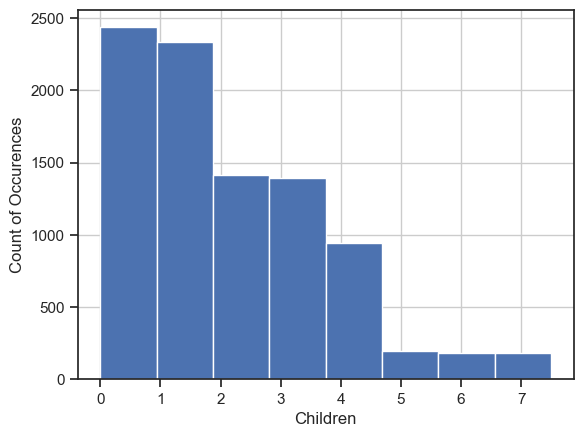

Univariate plot for  Age 



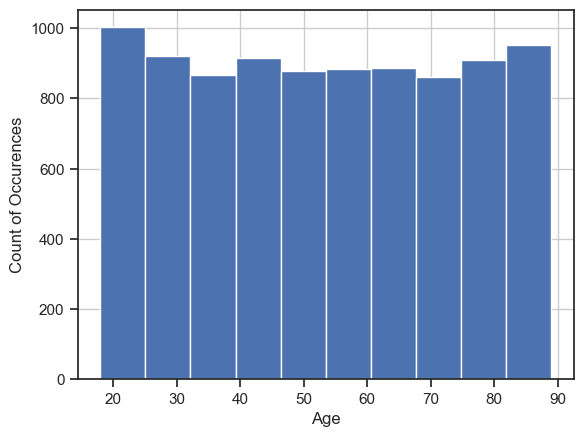

Univariate plot for  Income 



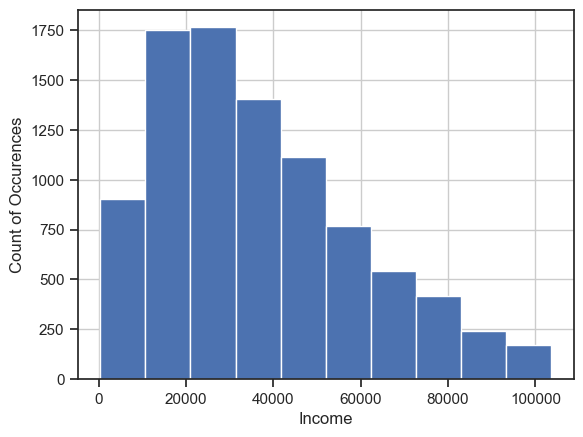

Univariate plot for  Outage_sec_perweek 



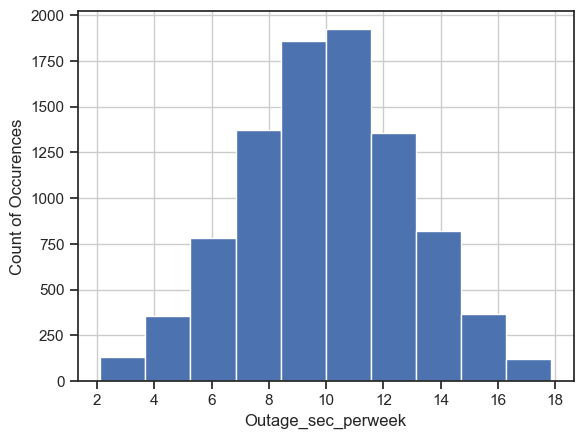

Univariate plot for  Contacts 



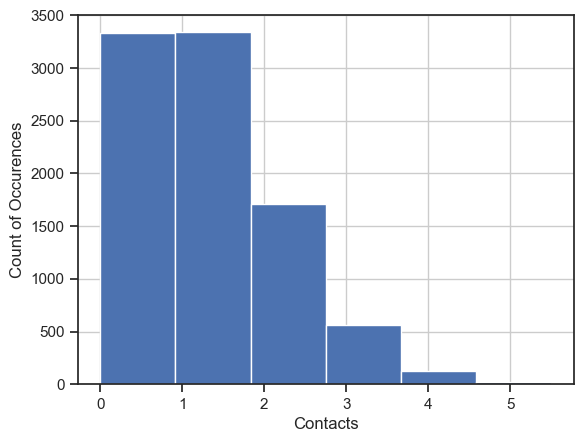

Univariate plot for  Email 



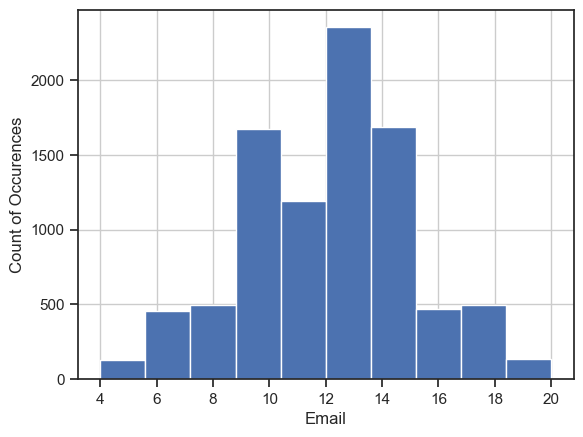

Univariate plot for  Yearly_equip_failure 



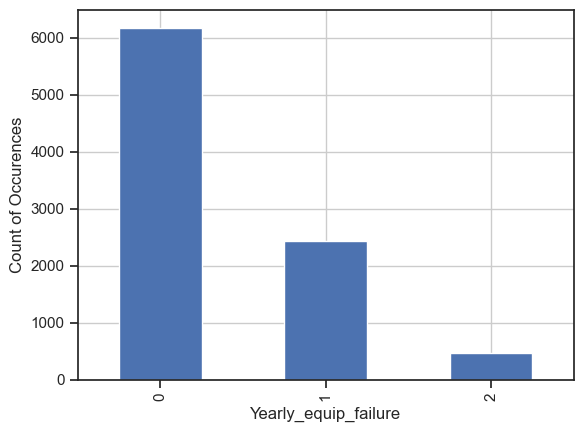

Univariate plot for  Techie 



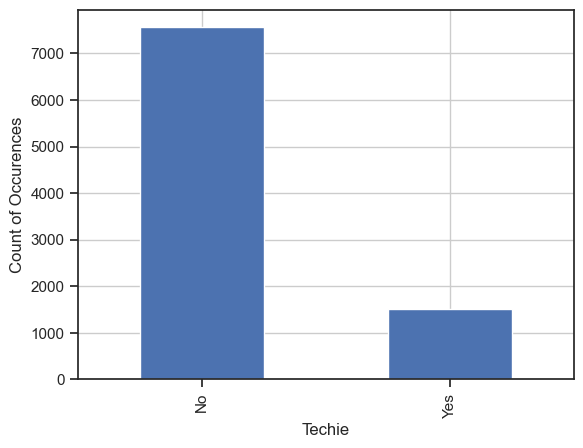

Univariate plot for  Multiple 



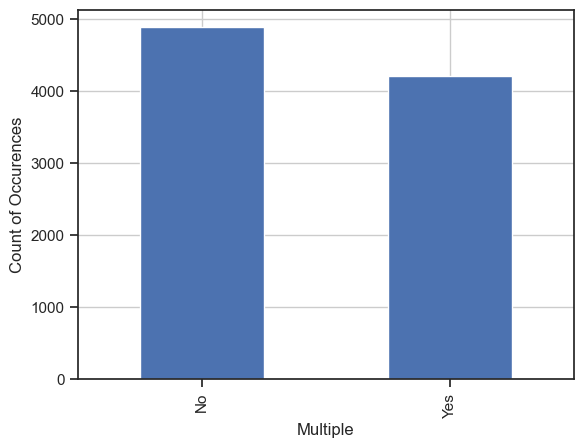

Univariate plot for  OnlineSecurity 



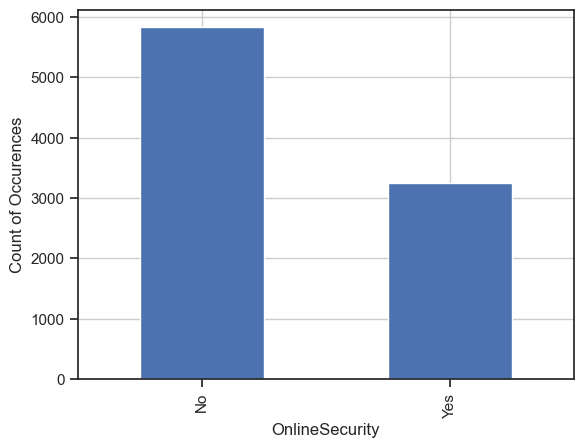

Univariate plot for  TechSupport 



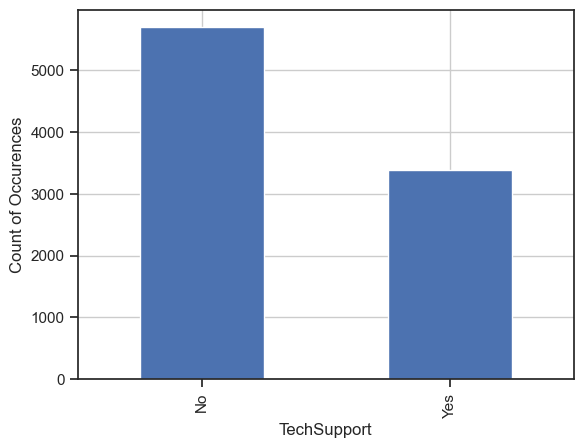

Univariate plot for  MonthlyCharge 



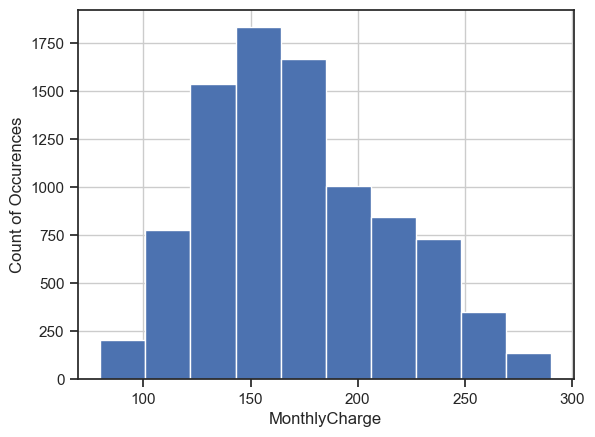

Univariate plot for  StreamingTV 



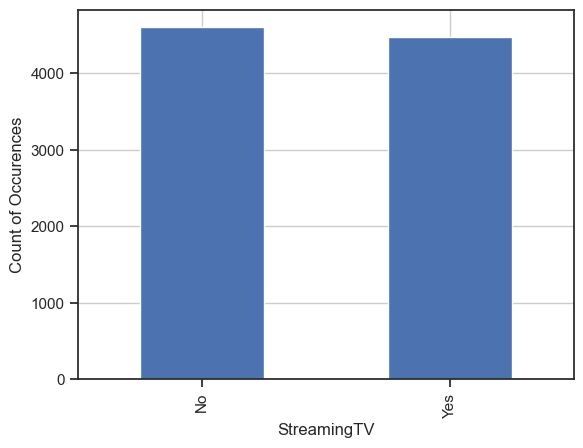

Univariate plot for  Churn 



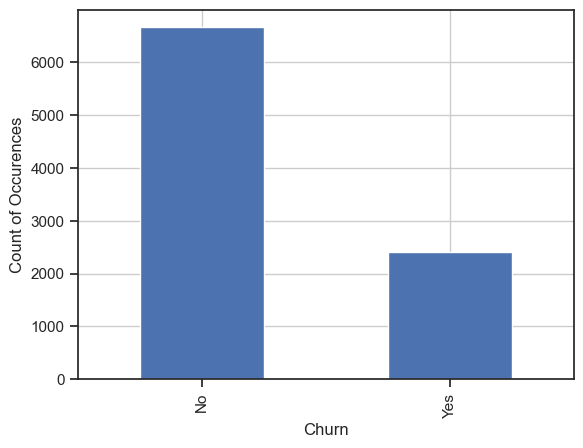

Univariate plot for  Bandwidth_GB_Year 



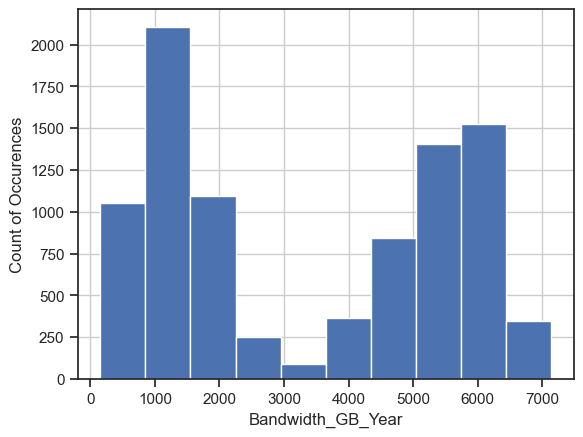

In [39]:
## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
seaborn.set_style("darkgrid")
seaborn.set(style="ticks")
for i in range(0, len(column_headers)):
    print("Univariate plot for ", column_headers[i], '\n')
    if churned_data_kNN[column_headers[i]].nunique() > 3 and churned_data_kNN[column_headers[i]].nunique() < 10:
        plt.hist(churned_data_kNN[column_headers[i]], 
                 bins = churned_data_kNN[column_headers[i]].nunique(), 
                 range = (churned_data_kNN[column_headers[i]].min(), (churned_data_kNN[column_headers[i]].max() + 0.5)))
        plt.xlabel(column_headers[i])
        plt.ylabel("Count of Occurences")
        plt.grid()
        plt.show()
    elif churned_data_kNN[column_headers[i]].nunique() < 4:
        churned_data_kNN[column_headers[i]].value_counts().plot(kind = 'bar')
        plt.xlabel(column_headers[i])
        plt.ylabel("Count of Occurences")
        plt.grid()
        plt.show()
    
    else:
        plt.hist(churned_data_kNN[column_headers[i]])
        plt.xlabel(column_headers[i])
        plt.ylabel("Count of Occurences")
        plt.grid()
        plt.show()

In [40]:
## Creating variables that are lists of each categorical and quantitative variable

churned_cont = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']
churned_cat = ['Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV']


Bivariate plot for Churn and Population


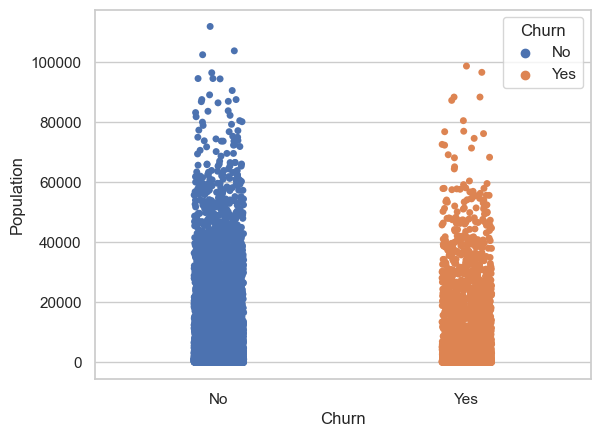

In [41]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Churn and Population")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Churn", y = "Population",  data = churned_data_kNN, hue = "Churn")
plt.show()


The count of Churn = Yes, Children =  0 is  646 

The count of Churn = No, Children =  0 is  1791 

The count of Churn = Yes, Children =  1 is  611 

The count of Churn = No, Children =  1 is  1725 

The count of Churn = Yes, Children =  2 is  371 

The count of Churn = No, Children =  2 is  1042 

The count of Churn = Yes, Children =  3 is  381 

The count of Churn = No, Children =  3 is  1011 

The count of Churn = Yes, Children =  4 is  262 

The count of Churn = No, Children =  4 is  682 

The count of Churn = Yes, Children =  5 is  59 

The count of Churn = No, Children =  5 is  137 

The count of Churn = Yes, Children =  6 is  35 

The count of Churn = No, Children =  6 is  144 

The count of Churn = Yes, Children =  7 is  48 

The count of Churn = No, Children =  7 is  134 



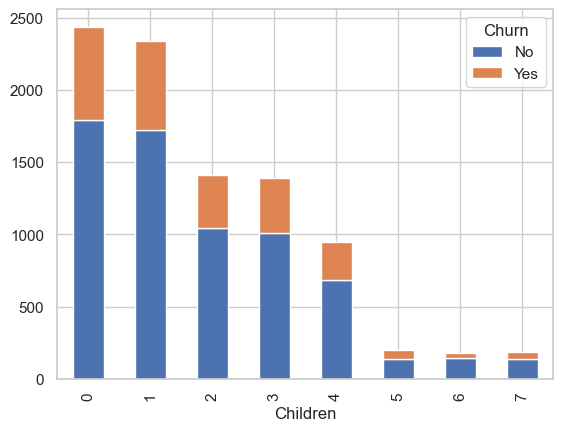

In [42]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_kNN[["Children", "Churn"]]

cat_plot = pd.crosstab(churned_data_kNN['Children'], churned_data_kNN['Churn']).plot(kind='bar', stacked=True)

for i in range(0,churned_data_kNN["Children"].nunique()):
    count_a = churned_data_test[(churned_data_test['Children'] == i) & (churned_data_test['Churn'] == 'Yes')].value_counts().tolist()[0]
    count_b = churned_data_test[(churned_data_test['Children'] == i) & (churned_data_test['Churn'] == 'No')].value_counts().tolist()[0]
    print('The count of Churn = Yes, Children = ', i, 'is ', count_a, '\n')
    print('The count of Churn = No, Children = ', i, 'is ', count_b, '\n')

Bivariate plot for Churn and Age


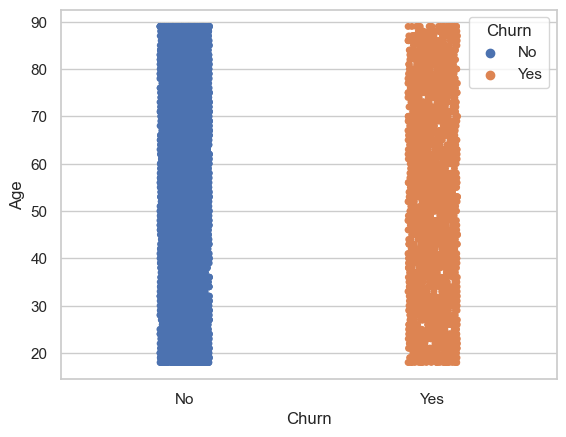

In [43]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Churn and Age")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Churn", y = "Age",  data = churned_data_kNN, hue = "Churn")
plt.show()


Bivariate plot for Churn and Income


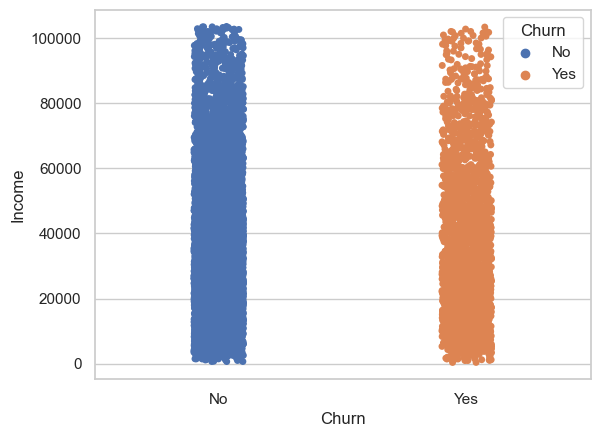

In [44]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Churn and Income")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Churn", y = "Income",  data = churned_data_kNN, hue = "Churn")
plt.show()


Bivariate plot for Churn and Outage_sec_perweek


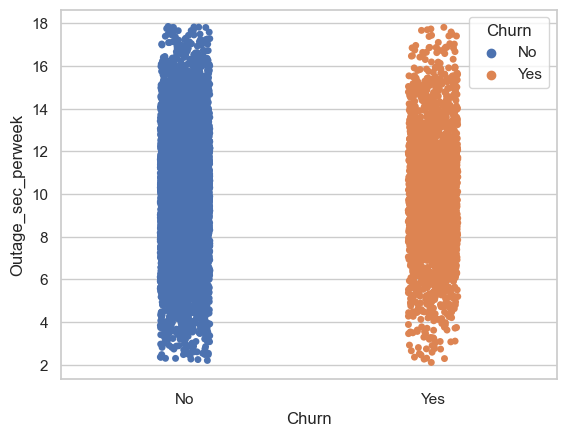

In [45]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Churn and Outage_sec_perweek")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Churn", y = "Outage_sec_perweek",  data = churned_data_kNN, hue = "Churn")
plt.show()


The count of Churn = Yes, Contacts =  0 is  858 

The count of Churn = No, Contacts =  0 is  2471 

The count of Churn = Yes, Contacts =  1 is  910 

The count of Churn = No, Contacts =  1 is  2430 

The count of Churn = Yes, Contacts =  2 is  460 

The count of Churn = No, Contacts =  2 is  1246 

The count of Churn = Yes, Contacts =  3 is  146 

The count of Churn = No, Contacts =  3 is  413 

The count of Churn = Yes, Contacts =  4 is  34 

The count of Churn = No, Contacts =  4 is  92 

The count of Churn = Yes, Contacts =  5 is  5 

The count of Churn = No, Contacts =  5 is  14 



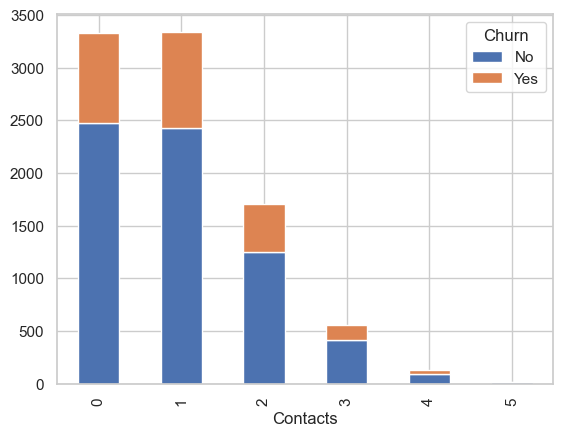

In [46]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_kNN[["Contacts", "Churn"]]

cat_plot = pd.crosstab(churned_data_kNN['Contacts'], churned_data_kNN['Churn']).plot(kind='bar', stacked=True)

for i in range(0,churned_data_kNN["Contacts"].nunique()):
    count_a = churned_data_test[(churned_data_test['Contacts'] == i) & (churned_data_test['Churn'] == 'Yes')].value_counts().tolist()[0]
    count_b = churned_data_test[(churned_data_test['Contacts'] == i) & (churned_data_test['Churn'] == 'No')].value_counts().tolist()[0]
    print('The count of Churn = Yes, Contacts = ', i, 'is ', count_a, '\n')
    print('The count of Churn = No, Contacts = ', i, 'is ', count_b, '\n')

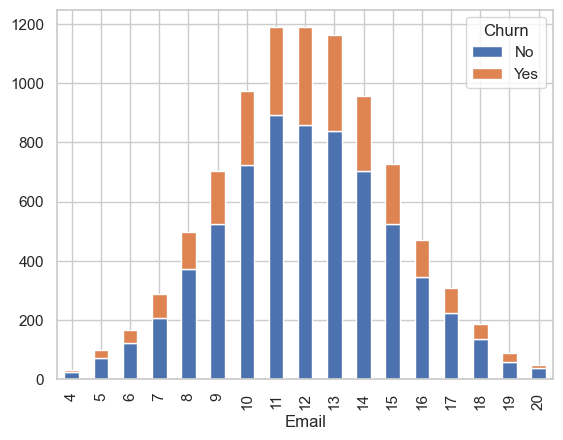

In [47]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_kNN[["Email", "Churn"]]

cat_plot = pd.crosstab(churned_data_kNN['Email'], churned_data_kNN['Churn']).plot(kind='bar', stacked=True)


The count of Churn = Yes, Yearly_equip_failure =  0 is  1650 

The count of Churn = No, Yearly_equip_failure =  0 is  4530 

The count of Churn = Yes, Yearly_equip_failure =  1 is  652 

The count of Churn = No, Yearly_equip_failure =  1 is  1780 

The count of Churn = Yes, Yearly_equip_failure =  2 is  111 

The count of Churn = No, Yearly_equip_failure =  2 is  356 



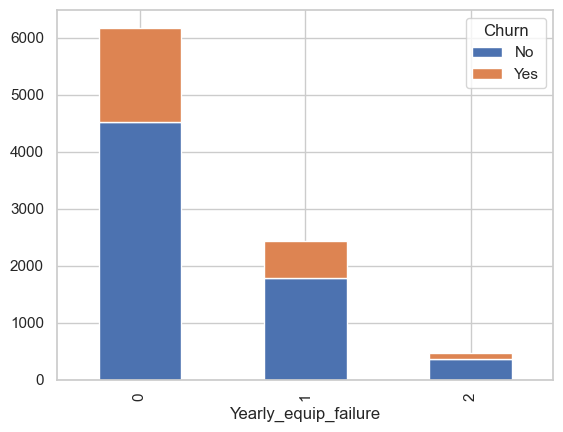

In [48]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_kNN[["Yearly_equip_failure", "Churn"]]

cat_plot = pd.crosstab(churned_data_kNN['Yearly_equip_failure'], churned_data_kNN['Churn']).plot(kind='bar', stacked=True)

for i in range(0,churned_data_kNN["Yearly_equip_failure"].nunique()):
    count_a = churned_data_test[(churned_data_test['Yearly_equip_failure'] == i) & (churned_data_test['Churn'] == 'Yes')].value_counts().tolist()[0]
    count_b = churned_data_test[(churned_data_test['Yearly_equip_failure'] == i) & (churned_data_test['Churn'] == 'No')].value_counts().tolist()[0]
    print('The count of Churn = Yes, Yearly_equip_failure = ', i, 'is ', count_a, '\n')
    print('The count of Churn = No, Yearly_equip_failure = ', i, 'is ', count_b, '\n')

The count of each combination of responses 

Techie  Churn
Yes     Yes      499
dtype: int64 

Techie  Churn
No      Yes      1914
dtype: int64 

Techie  Churn
Yes     No       1017
dtype: int64 

Techie  Churn
No      No       5649
dtype: int64 



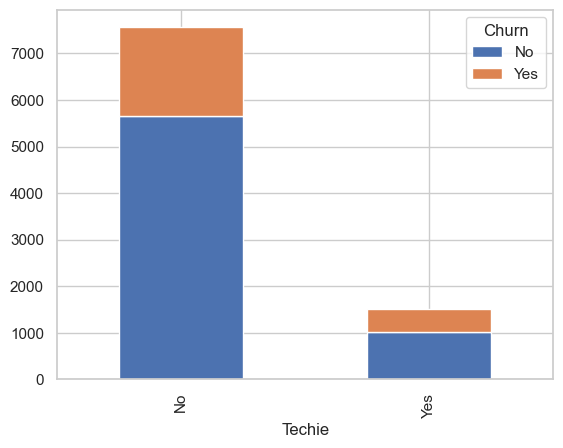

In [49]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_kNN[["Techie", "Churn"]]

cat_plot = pd.crosstab(churned_data_kNN['Techie'], churned_data_kNN['Churn']).plot(kind='bar', stacked=True)

for i in range(0,1):
    print('The count of each combination of responses', '\n')
    print(churned_data_test[(churned_data_test['Techie'] == 'Yes') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['Techie'] == 'No') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['Techie'] == 'Yes') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['Techie'] == 'No') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')

The count of each combination of responses 

Multiple  Churn
Yes       Yes      1382
dtype: int64 

Multiple  Churn
No        Yes      1031
dtype: int64 

Multiple  Churn
Yes       No       2816
dtype: int64 

Multiple  Churn
No        No       3850
dtype: int64 



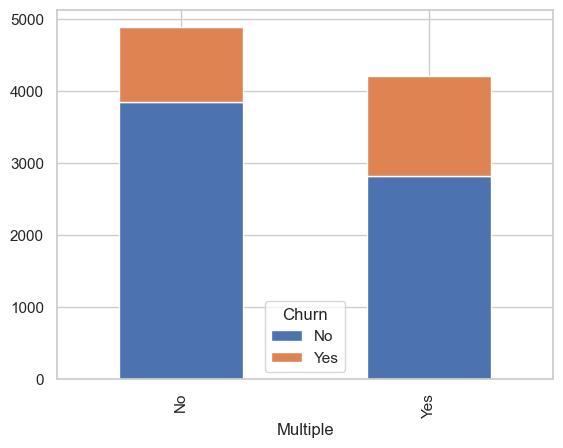

In [50]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_kNN[["Multiple", "Churn"]]

cat_plot = pd.crosstab(churned_data_kNN['Multiple'], churned_data_kNN['Churn']).plot(kind='bar', stacked=True)

for i in range(0,1):
    print('The count of each combination of responses', '\n')
    print(churned_data_test[(churned_data_test['Multiple'] == 'Yes') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['Multiple'] == 'No') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['Multiple'] == 'Yes') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['Multiple'] == 'No') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')

The count of each combination of responses 

OnlineSecurity  Churn
Yes             Yes      838
dtype: int64 

OnlineSecurity  Churn
No              Yes      1575
dtype: int64 

OnlineSecurity  Churn
Yes             No       2411
dtype: int64 

OnlineSecurity  Churn
No              No       4255
dtype: int64 



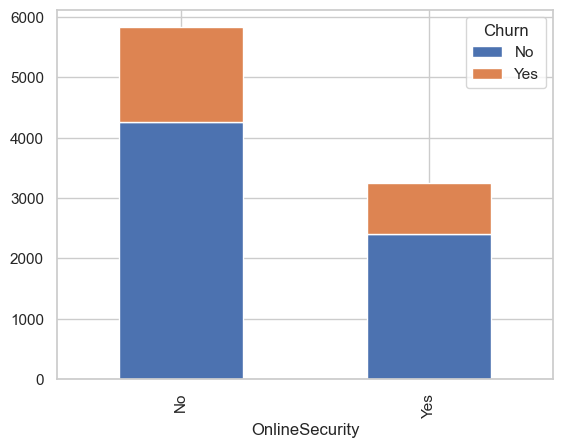

In [51]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_kNN[["OnlineSecurity", "Churn"]]

cat_plot = pd.crosstab(churned_data_kNN['OnlineSecurity'], churned_data_kNN['Churn']).plot(kind='bar', stacked=True)

for i in range(0,1):
    print('The count of each combination of responses', '\n')
    print(churned_data_test[(churned_data_test['OnlineSecurity'] == 'Yes') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['OnlineSecurity'] == 'No') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['OnlineSecurity'] == 'Yes') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['OnlineSecurity'] == 'No') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')

The count of each combination of responses 

TechSupport  Churn
Yes          Yes      933
dtype: int64 

TechSupport  Churn
No           Yes      1480
dtype: int64 

TechSupport  Churn
Yes          No       2452
dtype: int64 

TechSupport  Churn
No           No       4214
dtype: int64 



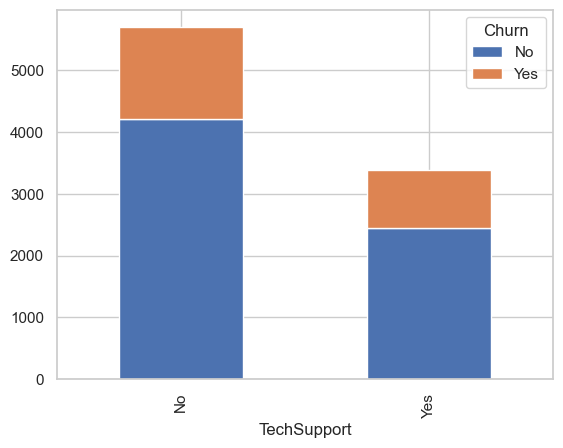

In [52]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_kNN[["TechSupport", "Churn"]]

cat_plot = pd.crosstab(churned_data_kNN['TechSupport'], churned_data_kNN['Churn']).plot(kind='bar', stacked=True)

for i in range(0,1):
    print('The count of each combination of responses', '\n')
    print(churned_data_test[(churned_data_test['TechSupport'] == 'Yes') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['TechSupport'] == 'No') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['TechSupport'] == 'Yes') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['TechSupport'] == 'No') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')

Bivariate plot for Churn and MonthlyCharge


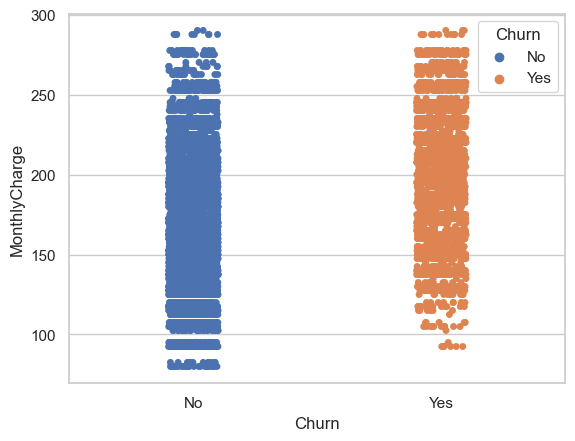

In [53]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Churn and MonthlyCharge")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Churn", y = "MonthlyCharge",  data = churned_data_kNN, hue = "Churn")
plt.show()


The count of each combination of responses 

StreamingTV  Churn
Yes          Yes      1656
dtype: int64 

StreamingTV  Churn
No           Yes      757
dtype: int64 

StreamingTV  Churn
Yes          No       2819
dtype: int64 

StreamingTV  Churn
No           No       3847
dtype: int64 



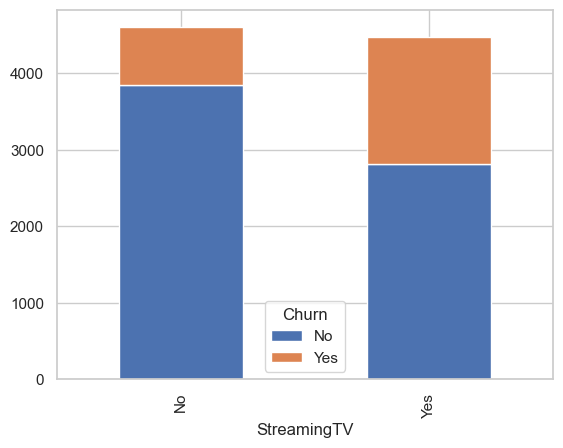

In [54]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_kNN[["StreamingTV", "Churn"]]

cat_plot = pd.crosstab(churned_data_kNN['StreamingTV'], churned_data_kNN['Churn']).plot(kind='bar', stacked=True)

for i in range(0,1):
    print('The count of each combination of responses', '\n')
    print(churned_data_test[(churned_data_test['StreamingTV'] == 'Yes') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['StreamingTV'] == 'No') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['StreamingTV'] == 'Yes') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['StreamingTV'] == 'No') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')

Bivariate plot for Churn and Bandwidth_GB_Year


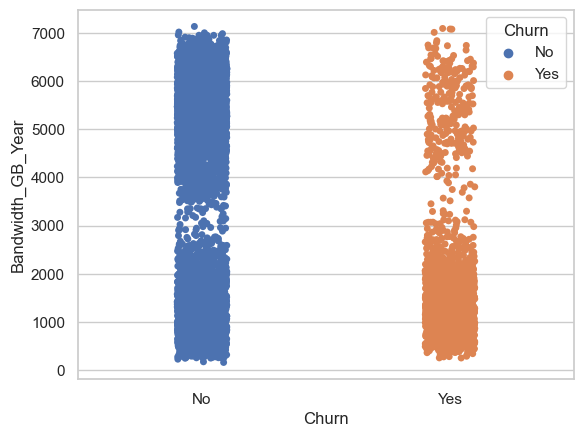

In [55]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Churn and Bandwidth_GB_Year")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Churn", y = "Bandwidth_GB_Year",  data = churned_data_kNN, hue = "Churn")
plt.show()


In [56]:
## Replacing all Yes/No responses with an int value corresponding to Yes = 1 and No = 0.
## Per my code from D206

churned_data_kNN = churned_data_kNN.replace({"Yes": 1, "No": 0})
#churned_data_kNN.head()

In [57]:
churned_data_kNN.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D209 Data Mining 1/Task 1/churn_data_kNN.csv')
#print(churned_data_kNN.shape)

In [58]:
## From https://campus.datacamp.com/courses/intermediate-regression-with-statsmodels-in-python/multiple-logistic-regression-4?ex=3
## https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.predict.html#statsmodels.discrete.discrete_model.Logit.predict-parameters

explanatory = churned_data_kNN[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',  'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'MonthlyCharge', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_kNN['Churn']

explanatory_train,explanatory_test,target_train,target_test = train_test_split(explanatory,target,test_size=0.3,random_state=1) 

explanatory_train.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D209 Data Mining 1/Task 1/explanatory_train.csv')
explanatory_test.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D209 Data Mining 1/Task 1/explanatory_test.csv')
target_train.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D209 Data Mining 1/Task 1/target_train.csv')
target_test.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D209 Data Mining 1/Task 1/target_test.csv')
